In [7]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np


### Задача №1
Построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [9]:
X, y = load_diabetes(return_X_y=True)
# делим данные на тестовые и обучающие
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [10]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [11]:
# функция проверки ошибки MSE
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [12]:
# функция для нахождения разницы между предсказанием и реальными данными, для получения дельты 
def residual(y, z):
    return - (z - y)

In [13]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [30]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [32]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5731.448672943588
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 6571.868503271728


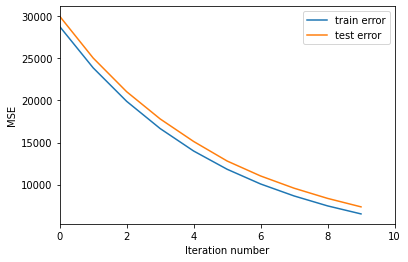

Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 5220.351212541809
Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 6837.651337059644


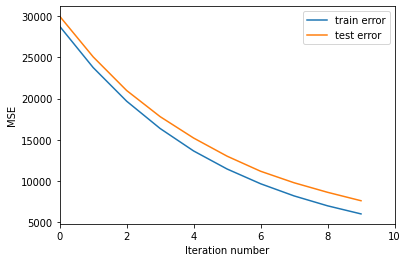

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4728.598056228966
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 6912.815038602383


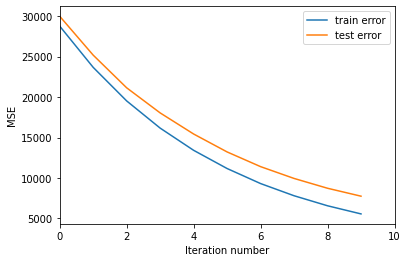

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2520.47364419789
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3558.3339524108455


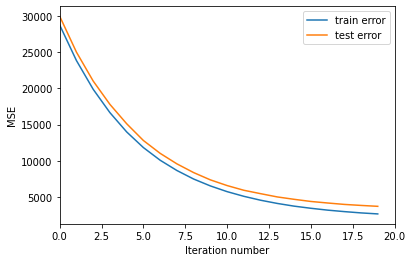

Ошибка алгоритма из 20 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 1892.2524274900898
Ошибка алгоритма из 20 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 3936.9033465583966


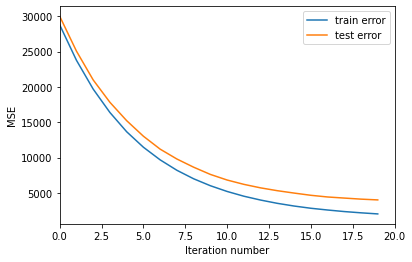

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1358.1382988503092
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3749.7329550170316


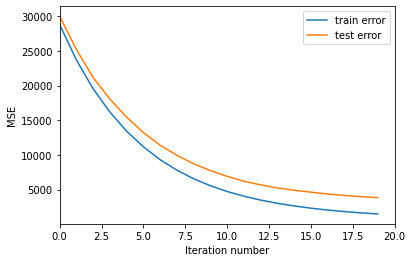

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1457.753453618487
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3056.626665972061


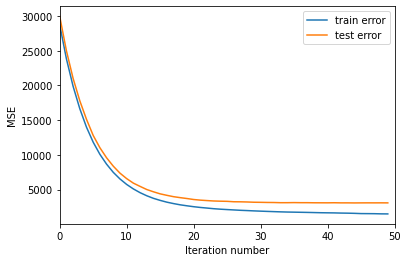

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 753.4325598077818
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 3557.20863740082


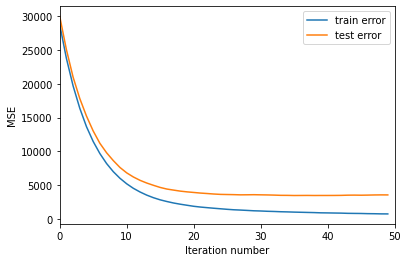

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 314.063353072312
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3217.6829596276466


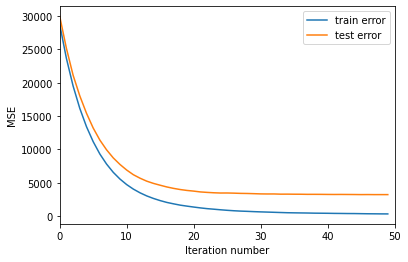

In [66]:
n_trees_list = [10, 20, 50]
max_depth_list = [3, 4, 5]
eta = 0.1

for n_trees in n_trees_list:
    for max_depth in max_depth_list:
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
        evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
        get_error_plot(n_trees, train_errors, test_errors)


Выводы по данному эксперименту следующие:
С увеличением количества деревьев в ансамбле ошибка уменьшается, причем очень значительно.
С увеличением глубины деревье разница в ошибке между обучающей и тестовой выборкой значительно увеличивается, что свидетельствует о переобучении модели.

### Задача № 2*
Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.


In [163]:
def gb_fit_sgb(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    #возмем половину выборки данных
    X_train = X_train[:round(len(X_train) / 2)]
    X_test = X_test[:round(len(X_test) / 2)]
    y_train = y_train[:round(len(y_train) / 2)]
    y_test = y_test[:round(len(y_test) / 2)]
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
                        
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [164]:
def get_error_plot_sgb(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    #plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

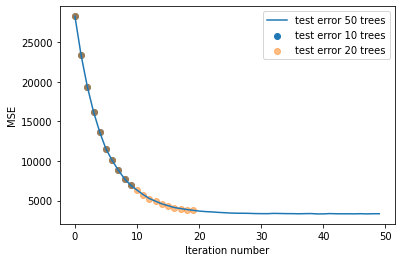

In [165]:
max_depth = 4
eta = 0.1


# 10 trees
trees_10, train_errors_10, test_errors_10 = gb_fit_sgb(10, max_depth, X_train, X_test, y_train, y_test, eta)

# 20 trees
trees_20, train_errors_20, test_errors_20 = gb_fit_sgb(20, max_depth, X_train, X_test, y_train, y_test, eta)

# 50 trees
trees_50, train_errors_50, test_errors_50 = gb_fit_sgb(50, max_depth, X_train, X_test, y_train, y_test, eta)


plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.scatter(list(range(10)), test_errors_10,label='test error 10 trees')
plt.scatter(list(range(20)), test_errors_20, alpha=0.5, label='test error 20 trees')
plt.plot(list(range(50)), test_errors_50, label='test error 50 trees')
plt.legend(loc='upper right')
plt.show()


Если смотреть на одном графике ошибки разных ансамблей, то мы видим что они в точности повторяют друг друга.